# Exploration

## Setup

In [10]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.utils import shuffle
import numpy as np

## Visualisation / Data Loading

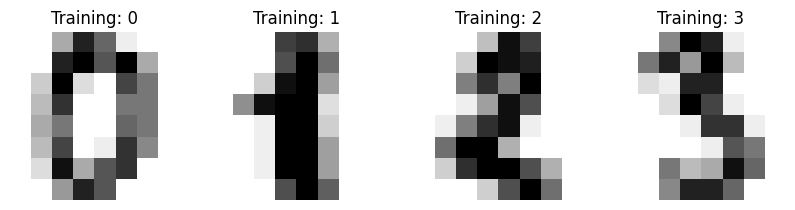

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# Dataset plus difficile mais encore majoritairement linéairement séparable
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.8, flip_y=0.05, random_state=42)

# Deux versions : données dans l'ordre vs données mélangées
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

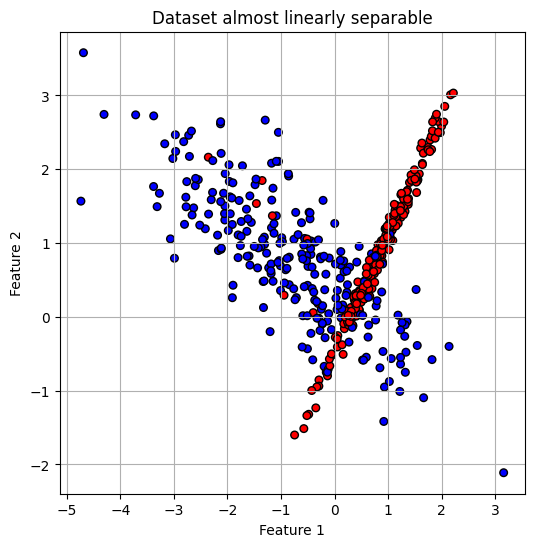

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=30)
plt.title("Dataset almost linearly separable")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## SVM

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

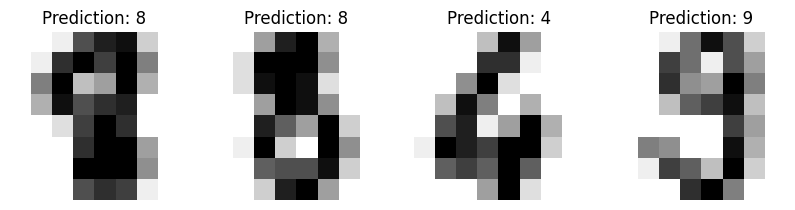

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

## Perceptron on Toy Dataset

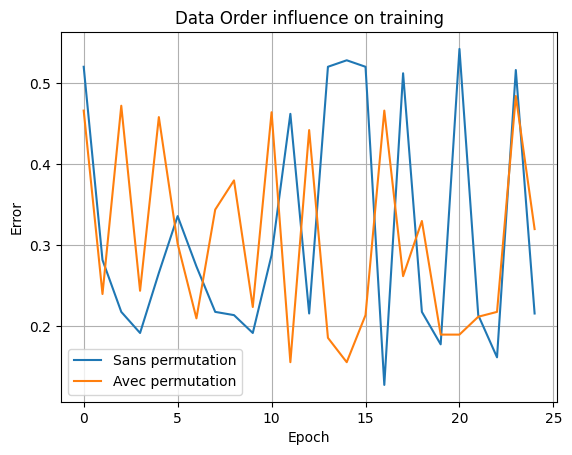

In [18]:
# 3. Initialise 2 identical perceptron
model_ordered = Perceptron(max_iter=1000, warm_start=True, random_state=42)
model_shuffled = Perceptron(max_iter=1000, warm_start=True, random_state=42)

n_epochs = 25
loss_ordered = []
loss_shuffled = []

def compute_error(model, X, y):
    return np.mean(model.predict(X) != y)

# 4. Train the 2 modèles epoch par epoch
for epoch in range(n_epochs):
    model_ordered.fit(X, y)
    model_shuffled.fit(X_shuffled, y_shuffled)
    
    loss_ordered.append(compute_error(model_ordered, X, y))
    loss_shuffled.append(compute_error(model_shuffled, X, y))

plt.plot(loss_ordered, label='Sans permutation')
plt.plot(loss_shuffled, label='Avec permutation')
plt.xlabel('Epoch')
plt.ylabel("Error")
plt.title("Data Order influence on training")
plt.legend()
plt.grid(True)
plt.show()